   Hours_Studied  Marks_Scored
0       4.370861     39.474642
1       9.556429     87.990051
2       7.587945     73.646880
3       6.387926     68.161258
4       2.404168     25.112146


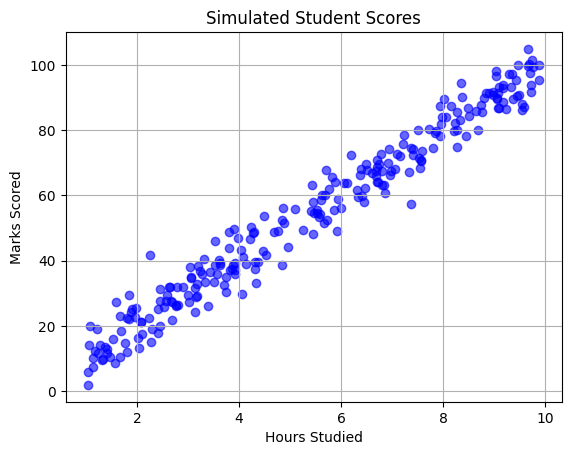

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 250

# Feature: Hours studied (1 to 10 hours)
hours = np.random.uniform(1, 10, n_samples)

# Target: Marks scored (10x hours + some noise)
marks = 10 * hours + np.random.normal(0, 5, n_samples)  # mean=0, std=5

# Step 2: Create DataFrame
df = pd.DataFrame({
    'Hours_Studied': hours,
    'Marks_Scored': marks
})

# Step 3: Preview the data
print(df.head())

# Optional: Save to CSV if you want
# df.to_csv("student_scores.csv", index=False)

# Step 4: Plot to visualize
plt.scatter(df['Hours_Studied'], df['Marks_Scored'], alpha=0.6, color='blue')
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.title("Simulated Student Scores")
plt.grid(True)
plt.show()


In [28]:
df

,Hours_Studied,Marks_Scored
0,4.370861,39.474642
1,9.556429,87.990051
2,7.587945,73.646880
3,6.387926,68.161258
4,2.404168,25.112146
...,...,...
245,9.354867,97.136382
246,4.853657,56.048359
247,9.699893,97.369408
248,9.672580,104.868876


In [29]:
marks_max = df['Marks_Scored'].max()
marks_min = df['Marks_Scored'].min()
dinomitor = marks_max-marks_min
marks_max,marks_min,dinomitor

(104.86887566588923, 1.8898699007052944, 102.97900576518394)

In [30]:
df['Percentage'] = ((df['Marks_Scored'] - marks_min)/dinomitor)*100


In [31]:
trainingData = df[['Hours_Studied','Percentage']]
trainingData

,Hours_Studied,Percentage
0,4.370861,36.497509
1,9.556429,83.609451
2,7.587945,69.681203
3,6.387926,64.354270
4,2.404168,22.550496
...,...,...
245,9.354867,92.491194
246,4.853657,52.591777
247,9.699893,92.717479
248,9.672580,100.000000


In [32]:
X = df[['Hours_Studied']]
X

,Hours_Studied
0,4.370861
1,9.556429
2,7.587945
3,6.387926
4,2.404168
...,...
245,9.354867
246,4.853657
247,9.699893
248,9.672580


In [33]:
y = df['Percentage']
y

0       36.497509
1       83.609451
2       69.681203
3       64.354270
4       22.550496
          ...    
245     92.491194
246     52.591777
247     92.717479
248    100.000000
249     75.724633
Name: Percentage, Length: 250, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

,Hours_Studied
132,2.078788
225,3.195907
238,6.809251
119,5.854080
136,5.669116
...,...
106,4.693446
14,2.636425
92,7.847065
179,2.237688


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model

LinearRegression()

In [38]:
model.fit(x_train,y_train)
model

LinearRegression()

In [40]:
y_predict = model.predict(x_test)
y_predict

array([51.55661955, 13.60372669, 45.53245678, 42.17383009, 88.92913351,
       18.39055578, 86.11291157, 30.87557597, 69.77616198, 87.01654383,
       64.06886515, 36.70534278, 32.84862172, 89.8590997 , 77.91044919,
       31.50305346, 37.88326356, 24.43403365, 42.00600618, 47.99794707,
       92.12299397, 33.75230271, 63.32323777, 15.02681741, 68.29535888,
       65.83967837, 88.25302911, 10.36303049, 61.08849576, 78.36356746,
       15.85553229, 90.58736201, 30.34328282, 81.97450139, 76.43948252,
       22.51694628, 45.91305311, 71.32163027, 38.05926429, 71.5169987 ,
       85.71958883, 53.75899004, 28.35698053, 65.62032229, 16.67953566,
       34.87690284, 61.26302061, 93.87146567, 28.15800658, 67.71593369])

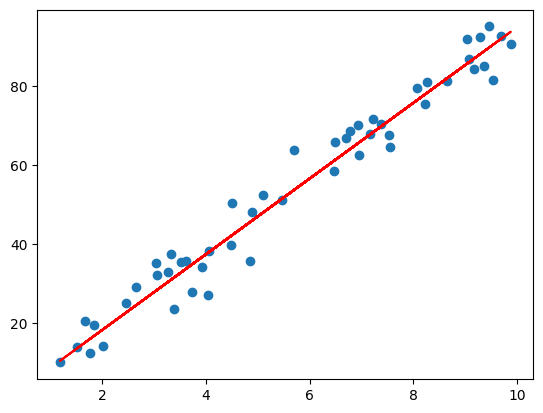

In [45]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict,color='red')

In [52]:
student1 = 4.5238742934
student2 = 8.2938472934

student1Prediction = model.predict([[student1]])
student2Prediction = model.predict([[student2]])
print('Student 1 will get', student1Prediction,'Percent')
print('Student 2 will get', student2Prediction,'Percent')

Student 1 will get [42.42136448] Percent
Student 2 will get [78.62173361] Percent


c:\Users\Jash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Jash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


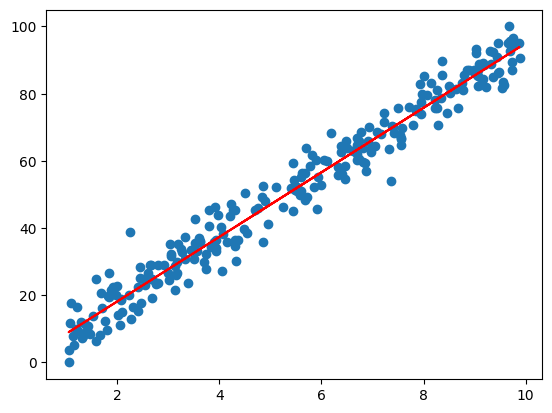

In [59]:
plt.scatter(X, y)
plt.plot(X, model.predict(X),color='red')

In [57]:
model.predict([[10]])

c:\Users\Jash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([95.00470446])

In [65]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [66]:
mean_squared_error(y, model.predict(X))

23.136650749640843

In [67]:
mean_squared_error(y, model.predict(X))**0.5

4.810057250141711

In [68]:
root_mean_squared_error(y,model.predict(X))

4.810057250141711

In [61]:
r2_score(y, model.predict(X))*100

96.59240539206924